# 11. Decision Tree

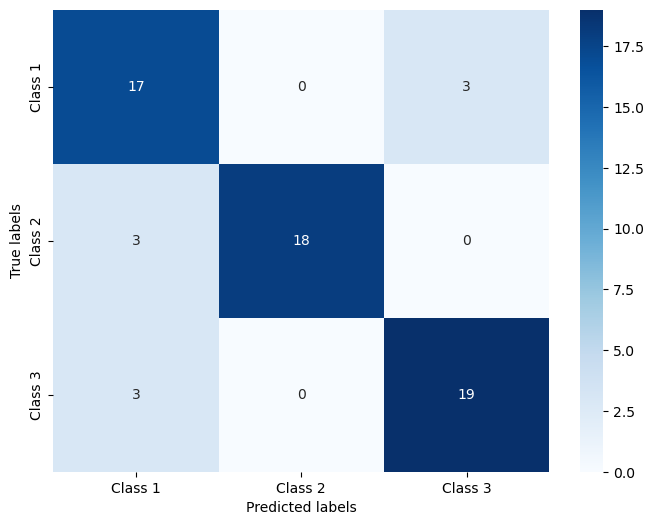

Accuracy: 0.8571428571428571
Precision: 0.8695652173913043
Recall: 0.8571428571428571
F1 Score: 0.8602947440156743

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.85      0.79        20
           2       1.00      0.86      0.92        21
           3       0.86      0.86      0.86        22

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.87      0.86      0.86        63



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Seeds dataset
data_path = "E:\Homework\ml\Task 2 - classification\seeds\seeds_dataset.txt"
column_names = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'type']
data = pd.read_csv(data_path, sep='\t+', header=None, names=column_names, engine='python')

# Split the dataset
X = data.iloc[:, :-1].values   # Select all columns except the last as features
y = data.iloc[:, -1].values   # Select the last column as the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Calculate and print accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
